In [ ]:



























!pip install flask pyngrok --quiet


In [ ]:
from pyngrok import ngrok

# Set your ngrok authtoken here
ngrok.set_auth_token("2wp1wTTD97xqr2RZwHOFZyCCm5w_6zFuLmoi28iWLLsWSeLmb")

# Start a tunnel on port 5000
public_url = ngrok.connect(5000)
print("🔗 Public URL:", public_url)


🔗 Public URL: NgrokTunnel: "https://48d9-34-16-221-254.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
# Import required libraries
from flask import Flask, request
from pyngrok import ngrok
from datetime import datetime
import os

# Initialize the Flask app
app = Flask(__name__)

# Set up ngrok tunnel (for public URL)
ngrok.set_auth_token("2wp1wTTD97xqr2RZwHOFZyCCm5w_6zFuLmoi28iWLLsWSeLmb")  # Replace with your actual token
public_url = ngrok.connect(5000)
print("🔗 Public URL:", public_url)

# Create a directory to save uploaded images (Make sure to use an absolute path in Colab)
UPLOAD_FOLDER = "/content/images"  # Absolute path for Google Colab environment
os.makedirs(UPLOAD_FOLDER, exist_ok=True)

# Route to handle image uploads
@app.route('/upload', methods=['POST'])
def upload():
    image_data = request.data  # Get raw image bytes

    if not image_data:
        return "❌ No image data received", 400

    # Save image with timestamp
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"image_{timestamp}.jpg"
    path = os.path.join(UPLOAD_FOLDER, filename)

    try:
        with open(path, "wb") as f:
            f.write(image_data)

        print(f"✅ Image saved as {filename}")
        return f"Image received and saved as {filename}", 200
    except Exception as e:
        print(f"❌ Error saving image: {str(e)}")
        return f"Error saving image: {str(e)}", 500

# Run Flask app
app.run()


🔗 Public URL: NgrokTunnel: "https://f7d4-34-16-221-254.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [09/May/2025 04:11:28] "POST /upload HTTP/1.1" 200 -


✅ Image saved as image_20250509_041128.jpg


INFO:werkzeug:127.0.0.1 - - [09/May/2025 04:12:11] "POST /upload HTTP/1.1" 200 -


✅ Image saved as image_20250509_041211.jpg


INFO:werkzeug:127.0.0.1 - - [09/May/2025 04:12:13] "POST /upload HTTP/1.1" 400 -
INFO:werkzeug:127.0.0.1 - - [09/May/2025 04:12:59] "POST /upload HTTP/1.1" 200 -


✅ Image saved as image_20250509_041259.jpg


In [ ]:
!pip install easyocr
!pip install imutils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

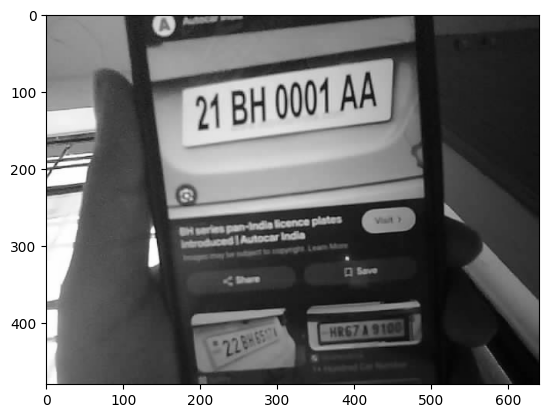

In [ ]:
img = cv2.imread("/content/images/image_20250509_041259.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

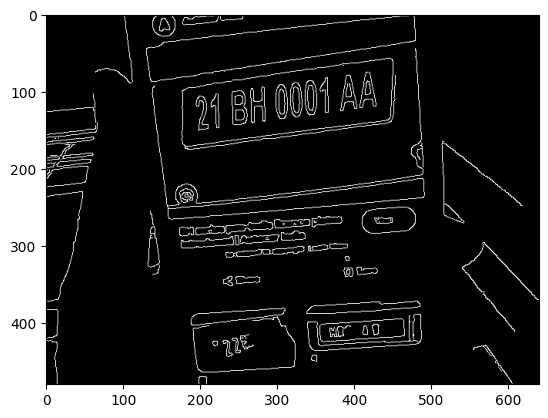

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [ ]:
location

array([[[450,  61]],

       [[443, 137]],

       [[177, 168]],

       [[184,  95]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

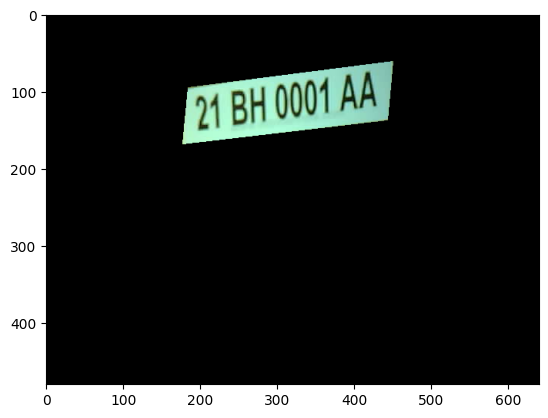

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

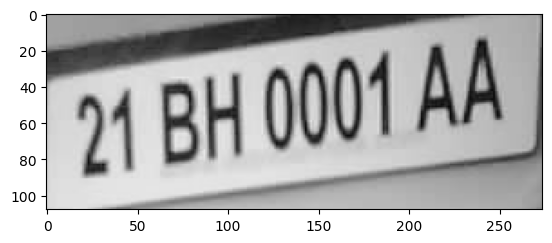

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))